In [3]:
from signal import signal

import numpy as np
import pandas as pd 
import os
import random

from IPython.core.pylabtools import figsize
from pandas.core.interchange.dataframe_protocol import DataFrame
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

In [4]:
eye_data = pd.read_csv('./data_eyes/EEG_Eye_State_Classification.csv',index_col=False)
print(eye_data.shape)
eye_data.describe()

(14980, 15)


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


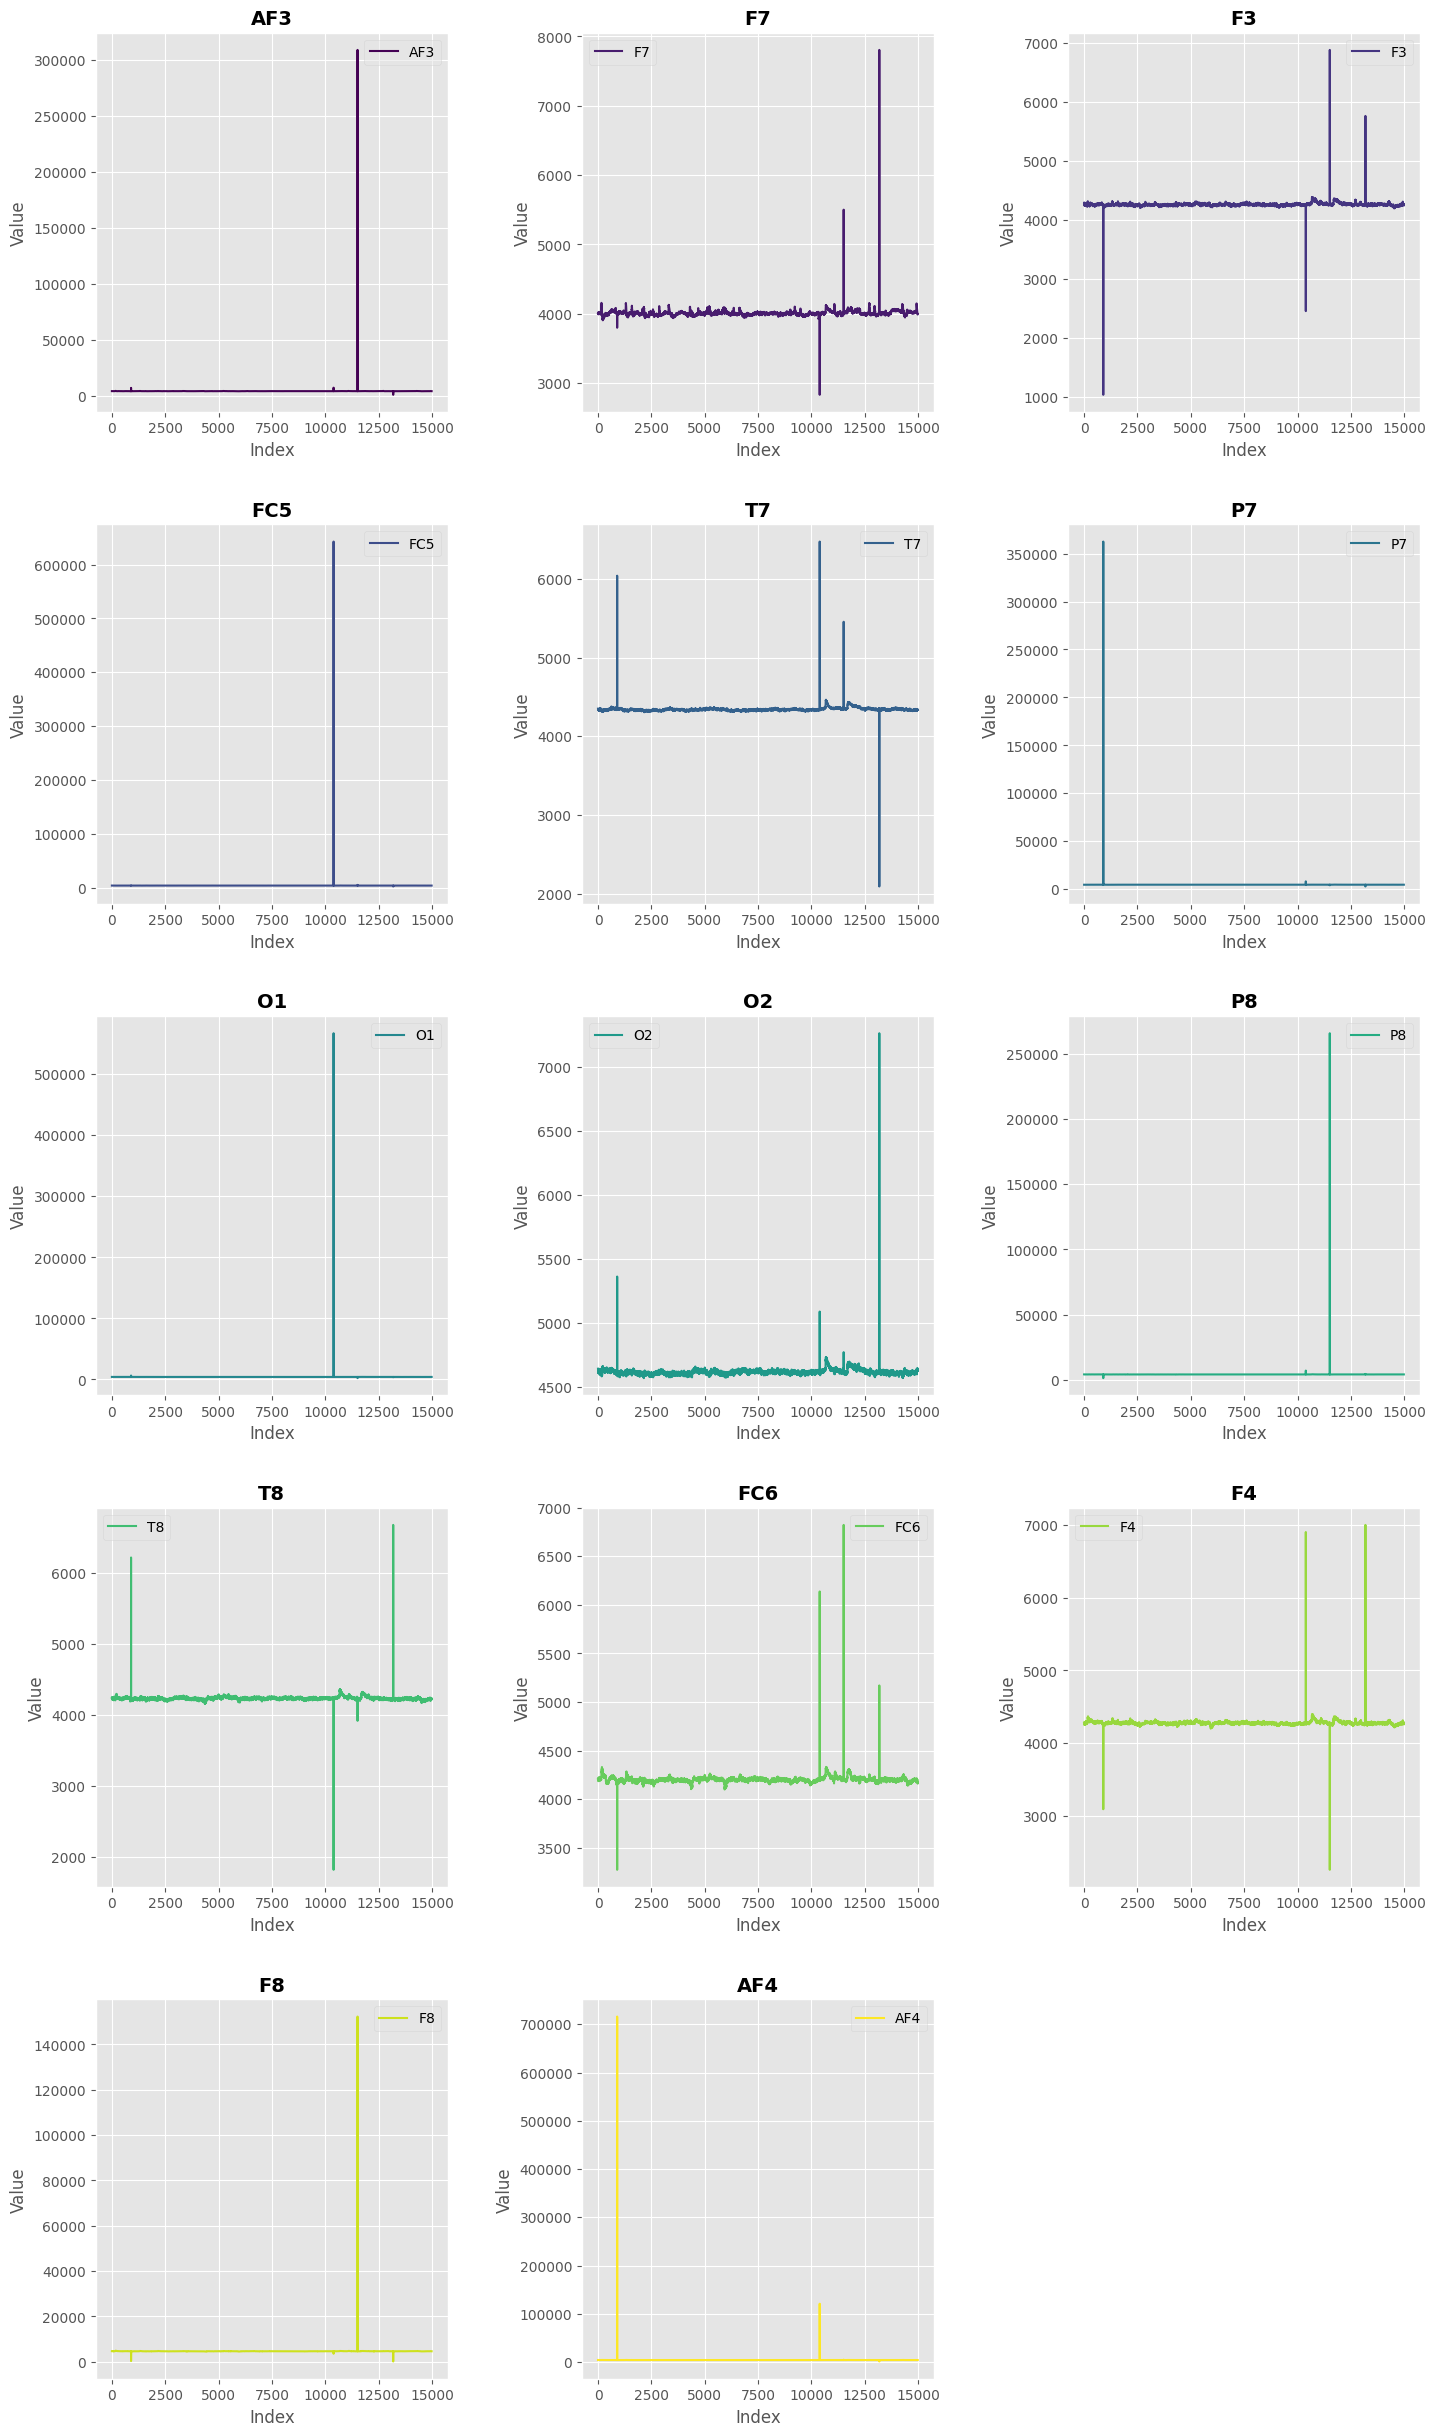

In [14]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')  # 一个更适合数据可视化的现代风格

colors = plt.cm.viridis(np.linspace(0, 1, len(eye_data.columns) - 1))  # 使用颜色映射生成颜色数组

# 确定子图的行列数
n_cols = 3  # 每行显示3个图
n_rows = (len(eye_data.columns) - 1) // n_cols + 1  # 计算需要多少行

plt.figure(figsize=(15, 5 * n_rows))  # 设置总图形的大小

for index, column in enumerate(eye_data.columns[:-1]):  # 假设最后一列是标签，不绘制
    plt.subplot(n_rows, n_cols, index + 1)  # 创建子图
    plt.plot(eye_data[column], label=column, color=colors[index])  # 绘制每列的数据，指定颜色
    plt.title(column, fontsize=14, fontweight='bold')  # 设置每个子图的标题为列名
    plt.xlabel('Time')  # X轴标签
    plt.ylabel('Value')  # Y轴标签
    plt.legend(frameon=True, framealpha=0.5, loc='best')  # 显示图例，带有半透明背景

plt.tight_layout(pad=3.0)  # 调整布局，设置间距防止重叠
plt.show()  # 显示图形



In [5]:
for column in eye_data.columns[:-1]:  # 假设最后一列是分类标签
    mean = eye_data[column].mean()
    std = eye_data[column].std()

    # 定义界限
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    # 过滤离群点
    eye_data = eye_data[(eye_data[column] >= lower_bound) & (eye_data[column] <= upper_bound)]


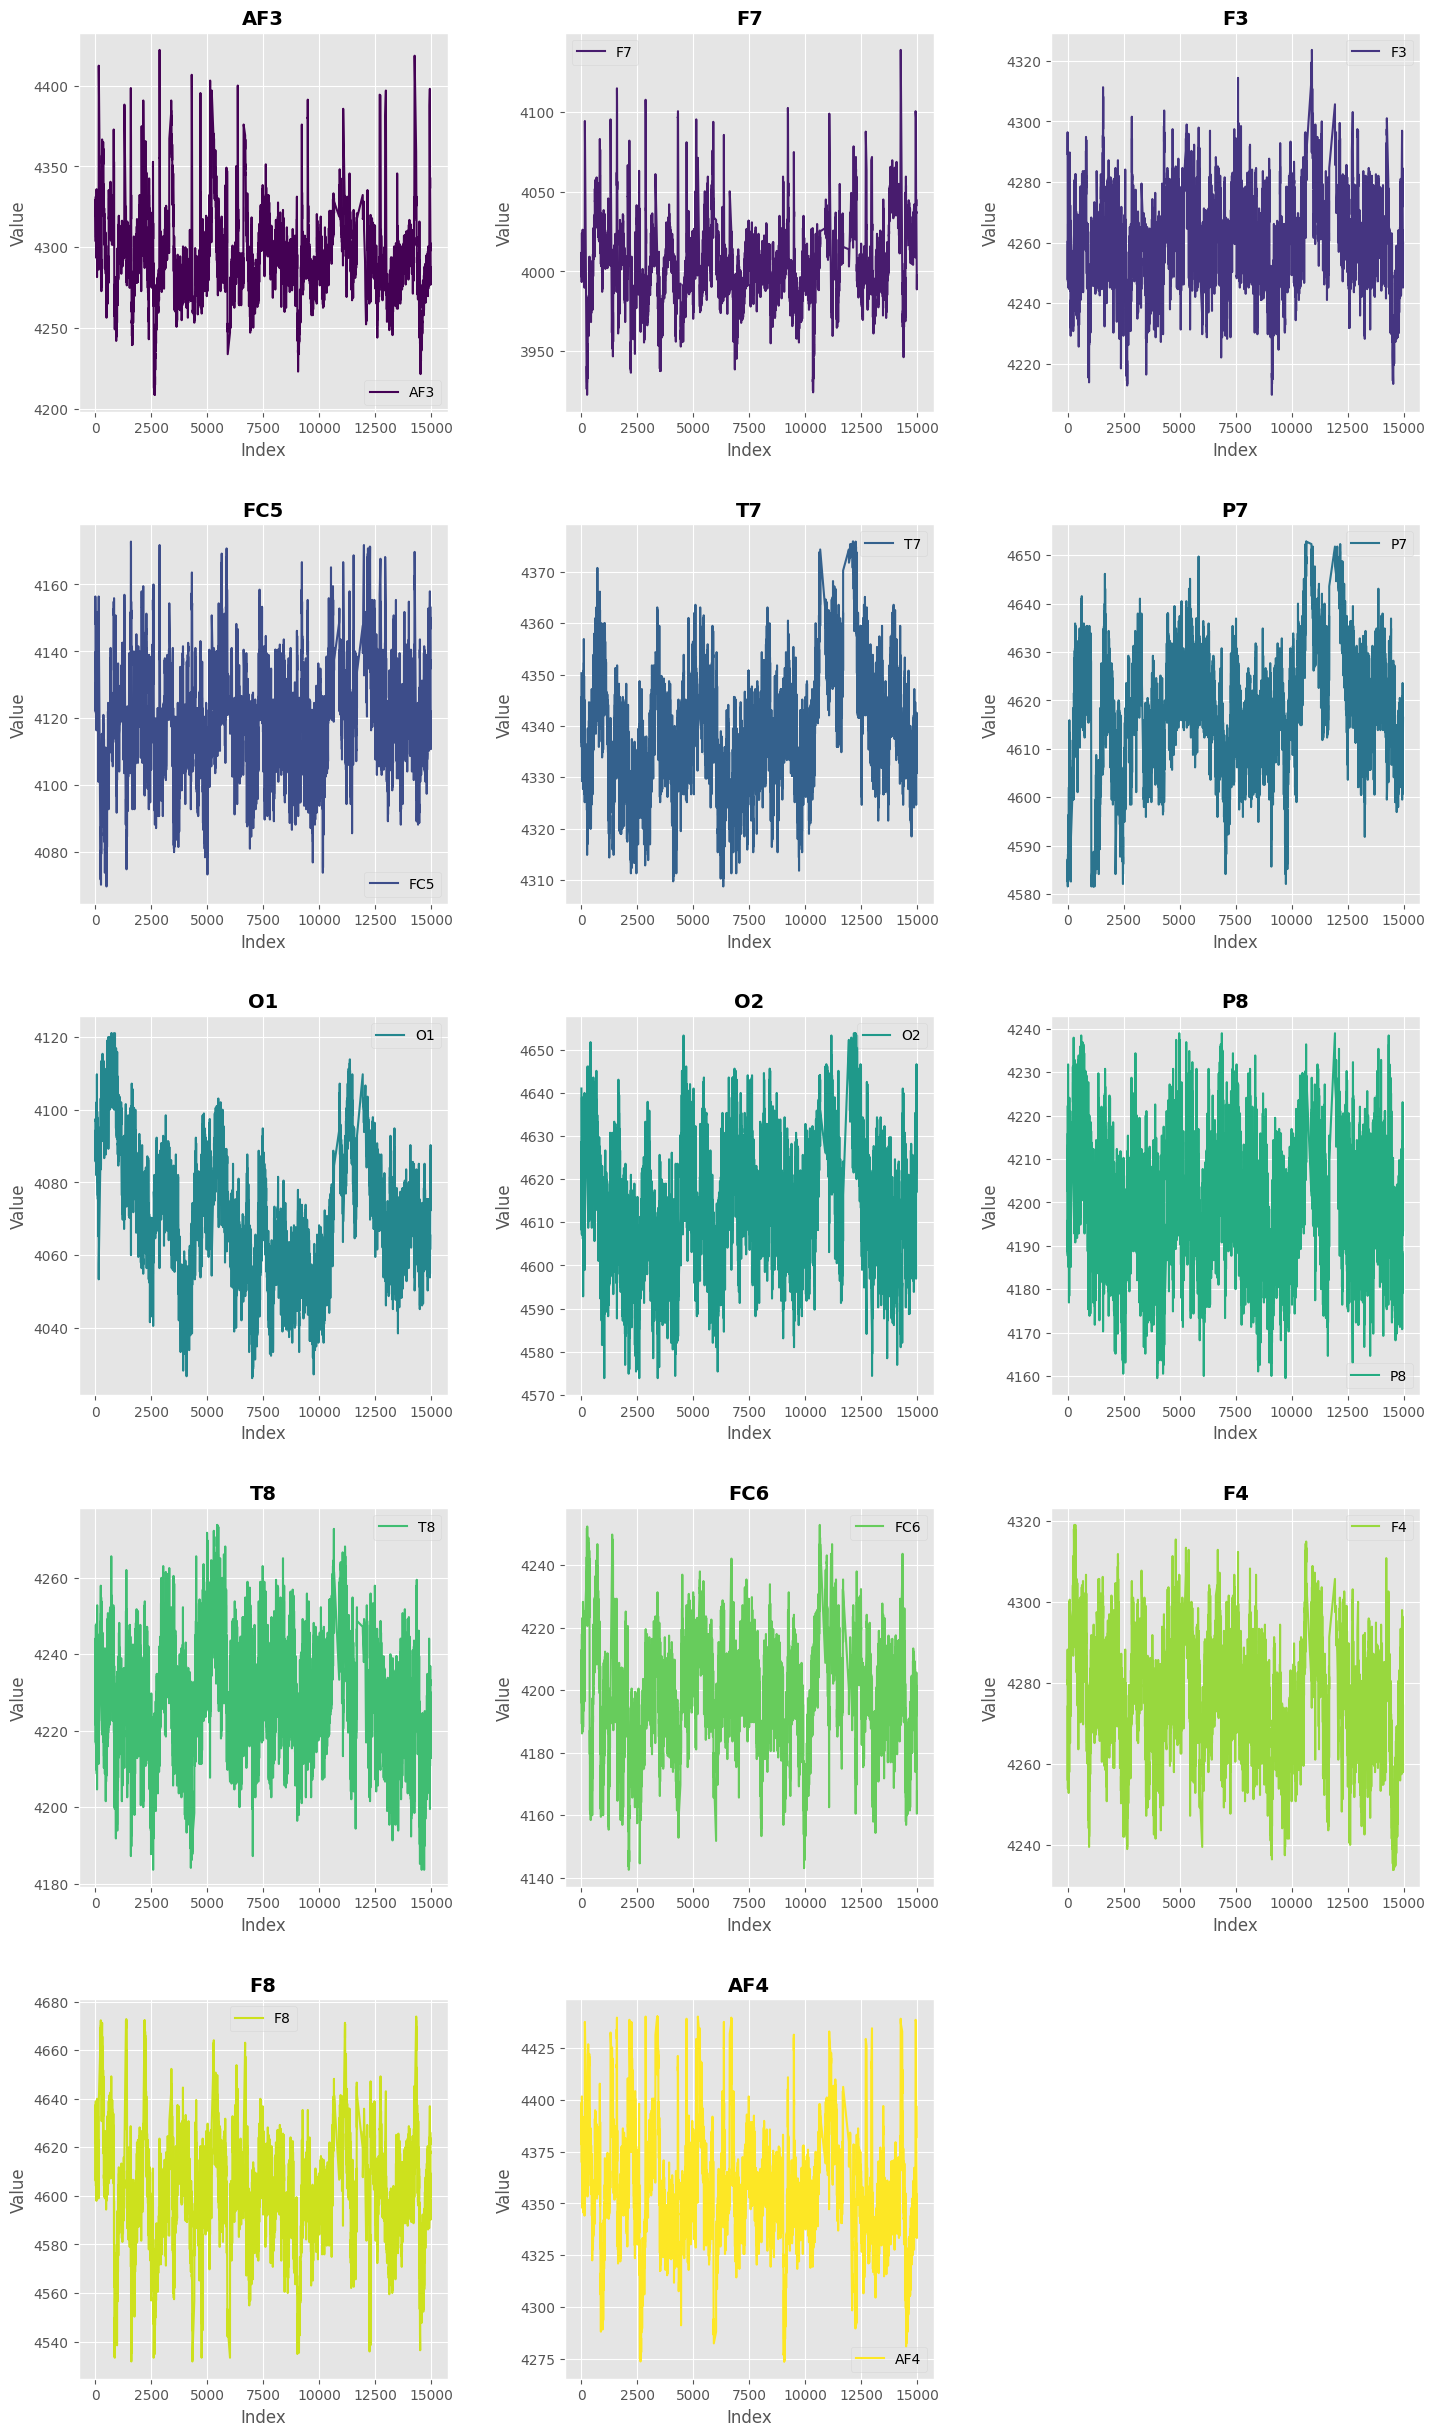

In [16]:
n_cols = 3  # 每行显示3个图
n_rows = (len(eye_data.columns) - 1) // n_cols + 1  # 计算需要多少行

plt.figure(figsize=(15, 5 * n_rows))  # 设置总图形的大小

for index, column in enumerate(eye_data.columns[:-1]):  # 假设最后一列是标签，不绘制
    plt.subplot(n_rows, n_cols, index + 1)  # 创建子图
    plt.plot(eye_data[column], label=column, color=colors[index])  # 绘制每列的数据，指定颜色
    plt.title(column, fontsize=14, fontweight='bold')  # 设置每个子图的标题为列名
    plt.xlabel('Time')  # X轴标签
    plt.ylabel('Value')  # Y轴标签
    plt.legend(frameon=True, framealpha=0.5, loc='best')  # 显示图例，带有半透明背景

plt.tight_layout(pad=3.0)  # 调整布局，设置间距防止重叠
plt.show()  # 显示图形

C:\Users\wu\.conda\envs\eeg\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\wu\.conda\envs\eeg\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning:

Casting complex values to real discards the imaginary part



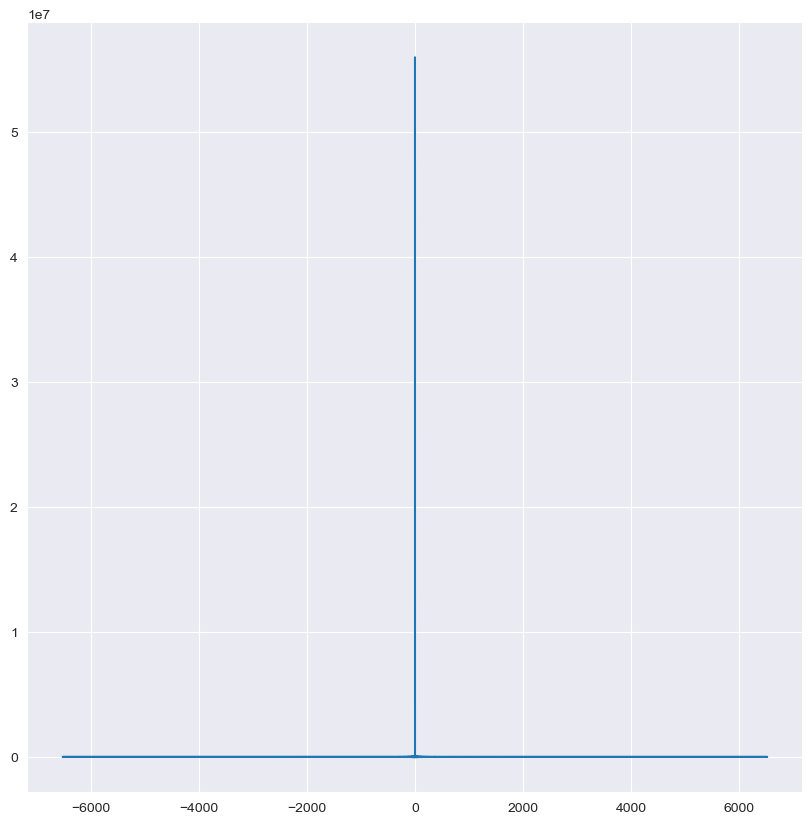

In [6]:
data = eye_data.iloc[:,0].to_numpy()
signal_data1 = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data), 1 / len(data))
fig = figsize(10,10)
plt.plot(frequencies, signal_data1)
plt.show()

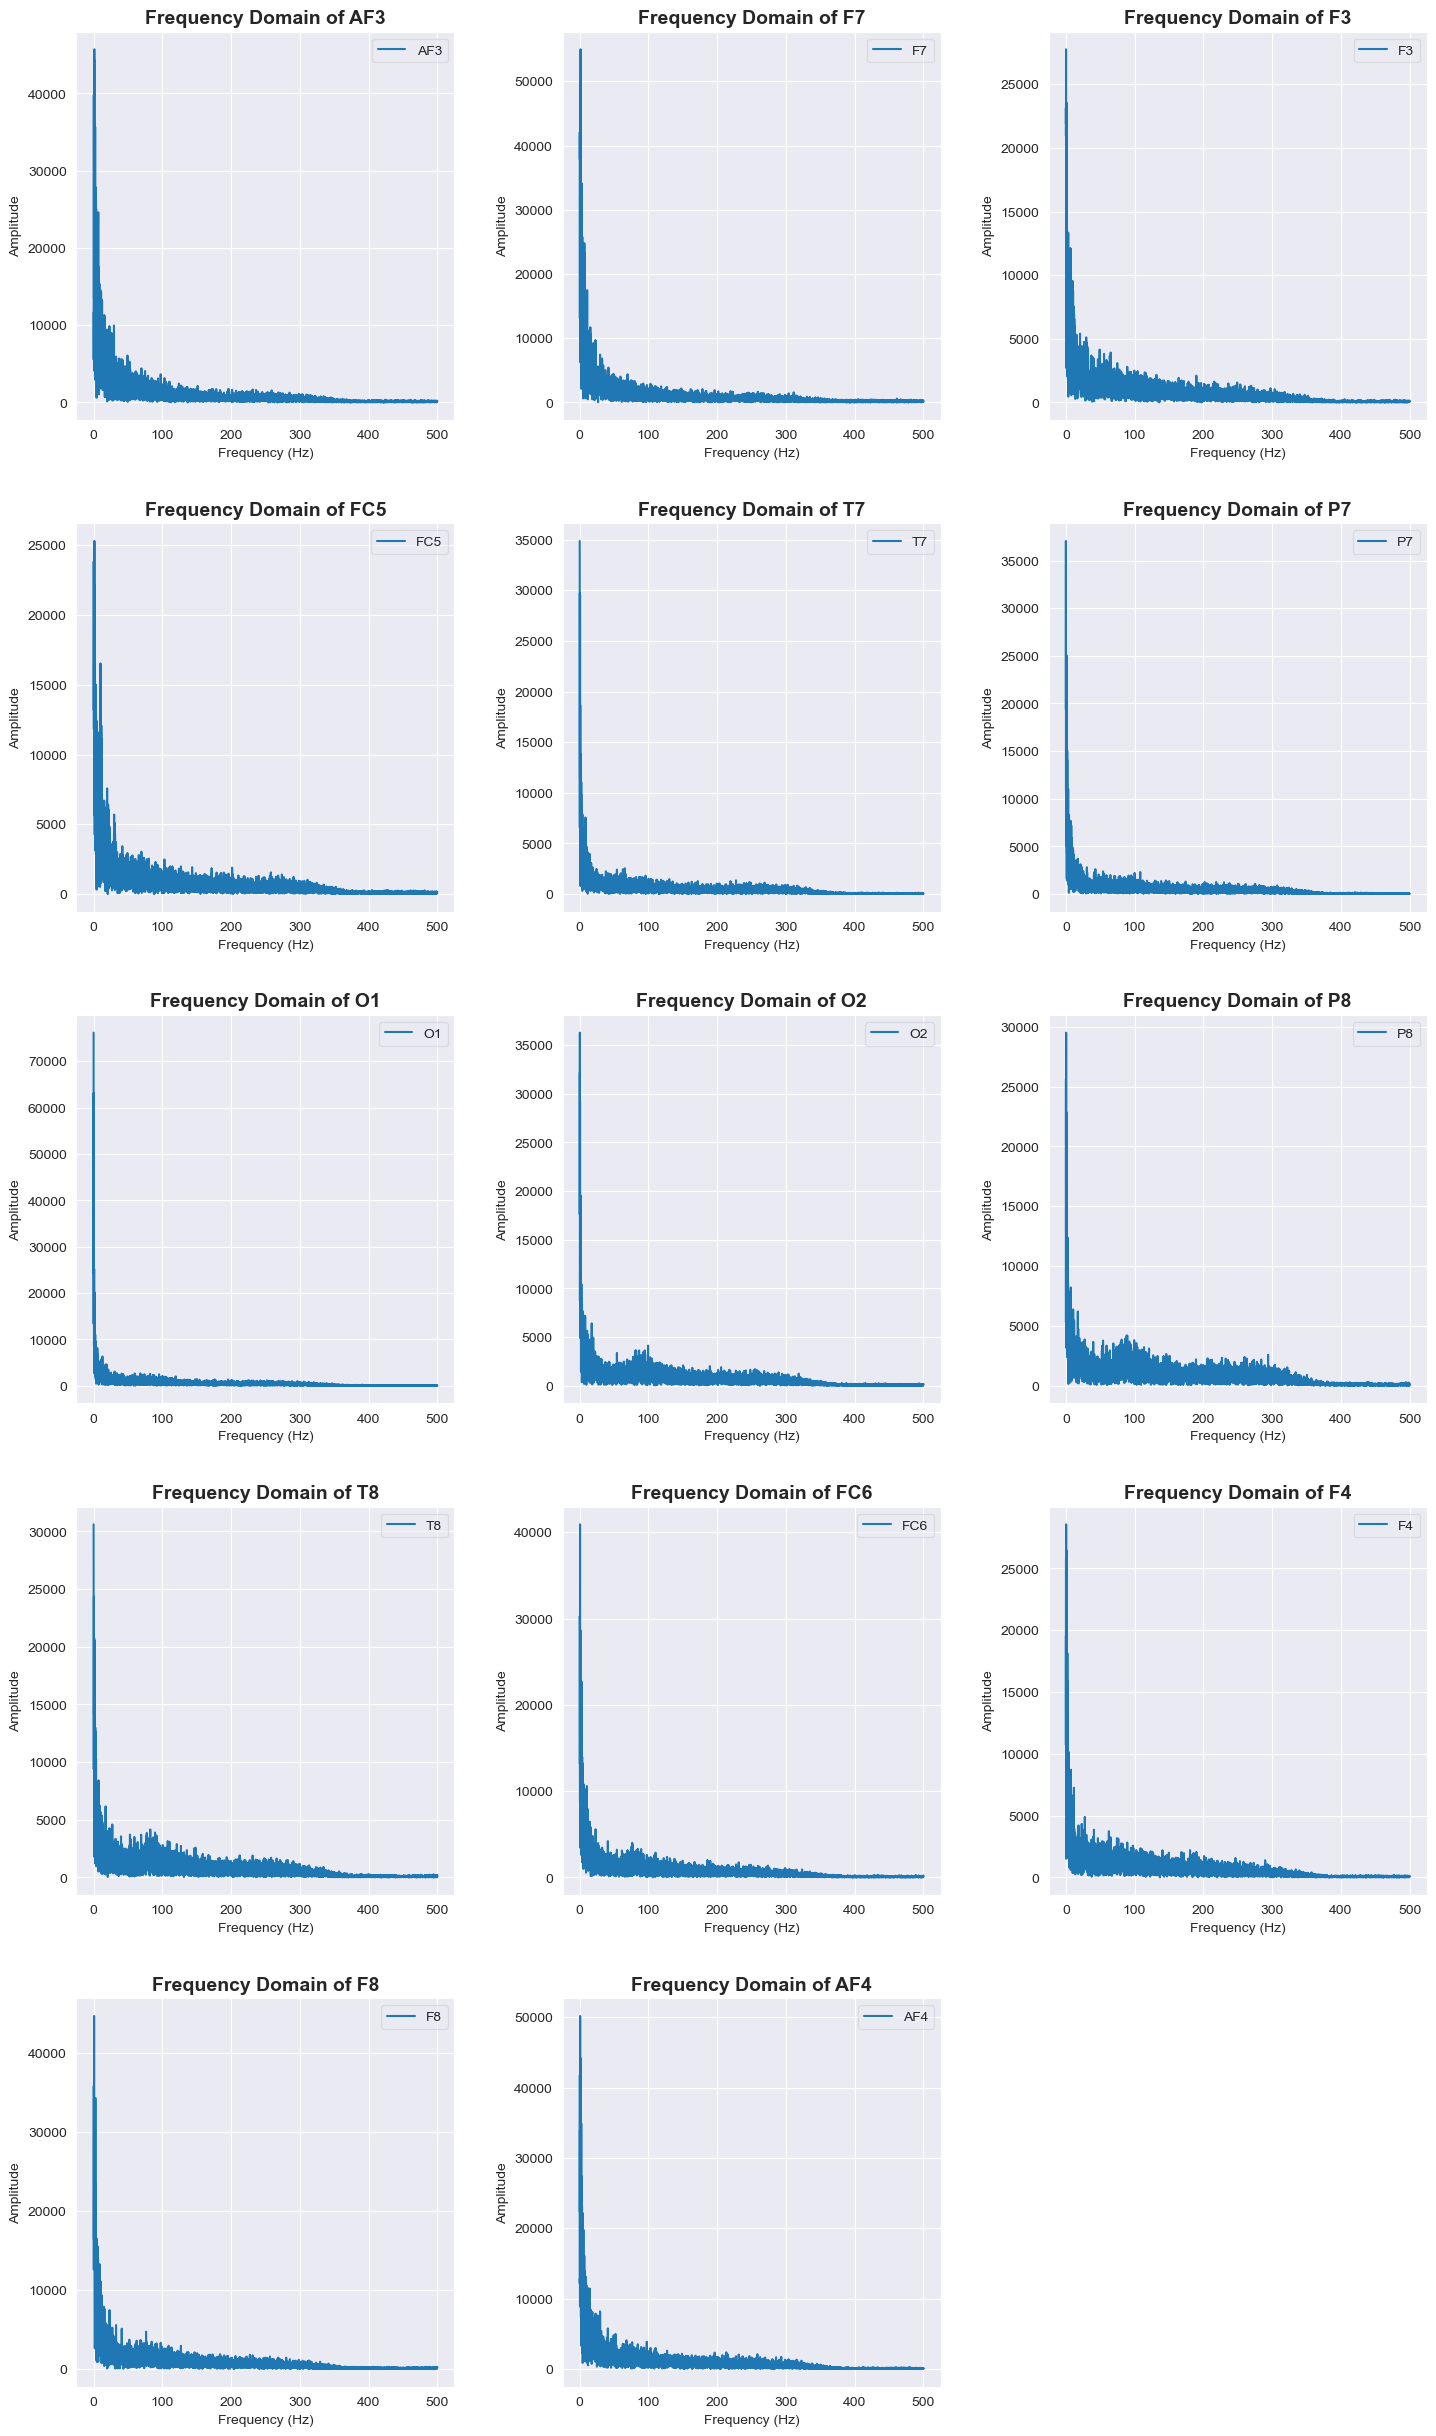

In [7]:
n_cols = 3  # 每行显示3个图
n_rows = (len(eye_data.columns) - 1) // n_cols + 1  # 计算需要多少行
sampling_rate = 1000  # 假设采样频率为1000Hz，可以根据实际情况调整

plt.figure(figsize=(15, 5 * n_rows))  # 设置总图形的大小

for index, column in enumerate(eye_data.columns[:-1]):  # 假设最后一列是标签，不绘制
    signal = eye_data[column].values  # 获取当前列数据
    fft_signal = np.fft.fft(signal)  # 计算FFT
    frequencies = np.fft.fftfreq(len(signal), 1 / sampling_rate)  # 计算频率
    
    # 只绘制正频率部分
    positive_frequencies = frequencies[1:len(frequencies)//2]
    fft_magnitude = np.abs(fft_signal)[1:len(frequencies)//2]

    plt.subplot(n_rows, n_cols, index + 1)  # 创建子图
    plt.plot(positive_frequencies, fft_magnitude, label=column)  # 绘制频域图
    plt.title(f'Frequency Domain of {column}', fontsize=14, fontweight='bold')  # 设置每个子图的标题为列名
    plt.xlabel('Frequency (Hz)')  # X轴标签
    plt.ylabel('Amplitude')  # Y轴标签
    plt.legend(frameon=True, framealpha=0.5, loc='best')  # 显示图例，带有半透明背景

plt.tight_layout(pad=3.0)  # 调整布局，设置间距防止重叠
plt.show()  # 显示图形


In [21]:
from pandas import DataFrame

def plot_3dSurface_and_heatmap(df: DataFrame, group: int | None):
    # Define group names based on 'group' value
    if group is None:
        filtered_df = df
        group_name = 'Correlation'
    else:
        if group == 0:
            group_name = 'Eye-Closed'
        else:
            group_name = 'Eye-Open'
        filtered_df = df[df['eyeDetection'] == group]
    
    # Create both 3D Surface and 2D Heatmap data objects
    surface = go.Surface(z=filtered_df.values, x=filtered_df.index, y=filtered_df.columns, showscale=False)
    heatmap = go.Heatmap(z=filtered_df.values, x=filtered_df.index, y=filtered_df.columns, showscale=True)

    # Configure layout with interactive buttons
    updatemenus = [
        dict(
            buttons=[
                dict(args=['type', 'surface'], label='3D Surface', method='restyle'),
                dict(args=['type', 'heatmap'], label='2D Heatmap', method='restyle')
            ],
            direction='left',
            pad=dict(r=10, t=10),
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.1,
            yanchor='top'
        )
    ]

    annotations = [
        dict(text='Display:', x=0, y=1.085, yref='paper', align='left', showarrow=False)
    ]

    fig = go.Figure(data=[surface], layout=go.Layout(
        title='3D Surface and Heatmap of Values for ' + group_name + ' Group',
        width=800,
        height=900,
        margin=dict(t=0, b=0, l=0, r=0),
        updatemenus=updatemenus,
        annotations=annotations,
        scene=dict(
            xaxis=dict(title='Sample Number', gridcolor='white', showbackground=True, backgroundcolor='rgb(230, 230, 230)'),
            yaxis=dict(title='Channel', gridcolor='white', showbackground=True, backgroundcolor='rgb(230, 230, 230)'),
            zaxis=dict(title='Sensor Value', gridcolor='white', showbackground=True, backgroundcolor='rgb(230, 230, 230)'),
            aspectratio=dict(x=1, y=1, z=0.7),
            aspectmode='manual'
        )
    ))

    # Display the figure
    fig.show()

In [35]:
data_num = eye_data.iloc[:,:-1]
cor = data_num.corr()
plot_3dSurface_and_heatmap(cor,group=None)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(eye_data, test_size=0.3, random_state=42)
# print(X_train.shape, X_test.shape)

y_train = X_train.iloc[:,-1].values
y_test = X_test.iloc[:,-1].values
# print(y_train.shape, y_test.shape)
# print(type(y_train[0]))

<class 'numpy.int64'>


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.iloc[:,:-1].to_numpy())
X_test = scaler.transform(X_test.iloc[:,:-1].to_numpy())


In [39]:
from torch.utils.data import TensorDataset, DataLoader
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# 定义数据集和数据加载器
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [43]:
import torch.nn as nn


class MLP(nn.Module):
    def __init__(self, input_size=14, hidden_size=64, num_classes=2, dropout_prob=0.5):
        super(MLP, self).__init__()
        # 第一层将输入维度从 36 减少到 32
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        # 第二层从 32 增加到给定的隐藏层大小
        self.fc2 = nn.Linear(128, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        # 第三层保持隐藏层大小不变
        self.fc3 = nn.Linear(hidden_size, 64)
        self.bn3 = nn.BatchNorm1d(64)
        # 第四层从隐藏层大小减少到 16
        self.fc4 = nn.Linear(64, 16)
        self.bn4 = nn.BatchNorm1d(16)
        # 最后一层从 16 减少到输出类别数
        self.fc5 = nn.Linear(16, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc5(x)
        return x



Epoch [1/200], Loss: 0.6961, Accuracy: 57.13%
Saved Best Model
Epoch [2/200], Loss: 0.6412, Accuracy: 63.40%
Saved Best Model
Epoch [3/200], Loss: 0.6074, Accuracy: 67.60%
Saved Best Model
Epoch [4/200], Loss: 0.5722, Accuracy: 71.42%
Saved Best Model
Epoch [5/200], Loss: 0.5333, Accuracy: 73.79%
Saved Best Model
Epoch [6/200], Loss: 0.5107, Accuracy: 75.65%
Saved Best Model
Epoch [7/200], Loss: 0.4945, Accuracy: 77.09%
Saved Best Model
Epoch [8/200], Loss: 0.4677, Accuracy: 78.75%
Saved Best Model
Epoch [9/200], Loss: 0.4564, Accuracy: 79.88%
Saved Best Model
Epoch [10/200], Loss: 0.4443, Accuracy: 80.97%
Saved Best Model
Epoch [11/200], Loss: 0.4324, Accuracy: 81.47%
Saved Best Model
Epoch [12/200], Loss: 0.4116, Accuracy: 82.30%
Saved Best Model
Epoch [13/200], Loss: 0.4116, Accuracy: 82.71%
Saved Best Model
Epoch [14/200], Loss: 0.4052, Accuracy: 83.14%
Saved Best Model
Epoch [15/200], Loss: 0.3904, Accuracy: 83.55%
Saved Best Model
Epoch [16/200], Loss: 0.3979, Accuracy: 83.32%
Ep

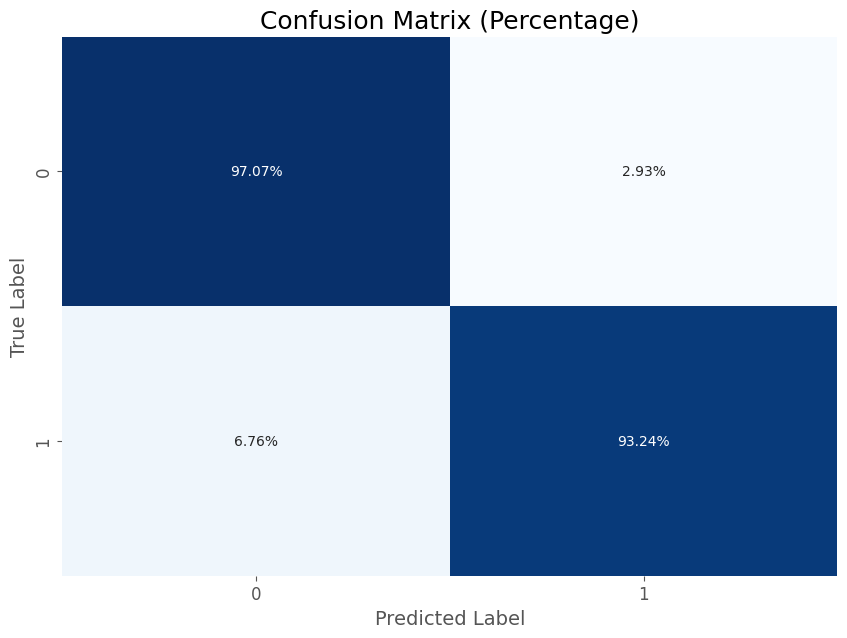

In [49]:
from sklearn.metrics import confusion_matrix
from torch import optim

input_size = X_train.shape[1]
hidden_size = 64  # 隐藏层神经元数量
num_classes = 2  # 类别数（多分类）
learning_rate = 0.001
num_epochs = 200

# 初始化模型并将其移动到GPU
model = MLP(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes).to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 多分类任务用 CrossEntropyLoss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
best_accuracy = 0.0
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

    # 保存最好的模型
    if epoch_acc > best_accuracy:
        best_accuracy = epoch_acc
        torch.save(model.state_dict(), f'model_best.pth')
        print("Saved Best Model")

# 评估模型
model.eval()  # 设置为评估模式
all_labels = []
all_predictions = []
all_probs = [] 
with torch.no_grad():  # 禁用梯度计算，节省计算和内存使用
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # 确保数据也在正确的设备上
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)  # 使用 softmax 得到概率
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
        all_probs.extend(probs[:, 1].cpu().numpy())  # 取出正类的概率，用于AUC-ROC

# 计算混淆矩阵
cm = confusion_matrix(all_labels, all_predictions)

# 将混淆矩阵转换为百分比
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 计算准确率
accuracy = np.trace(cm) / np.sum(cm)
print(f'Accuracy: {accuracy:.4f}')

# 绘制百分比混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Percentage)', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

precision = precision_score(all_labels, all_predictions, average='binary')
recall = recall_score(all_labels, all_predictions, average='binary')
f1 = f1_score(all_labels, all_predictions, average='binary')
mse = mean_squared_error(all_labels, all_predictions)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'MSE: {mse:.4f}')

Precision: 0.9630
Recall: 0.9324
F1 Score: 0.9475
MSE: 0.0465


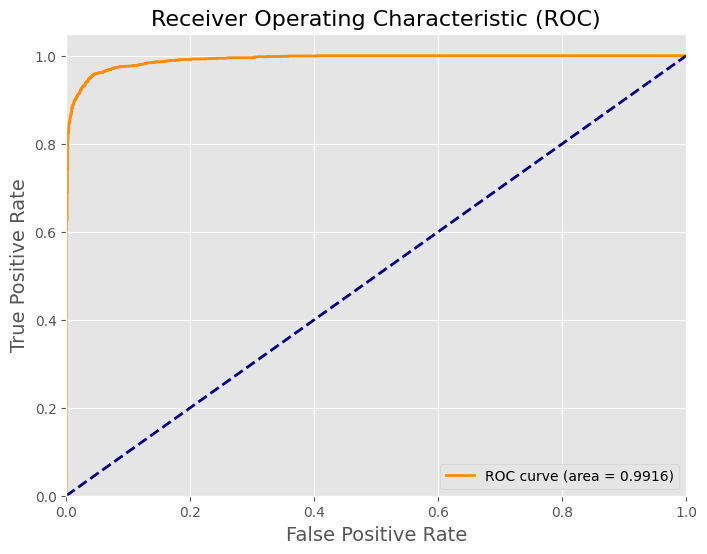

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

# 绘制 AUC-ROC 曲线
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = roc_auc_score(all_labels, all_probs)
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc="lower right")
plt.show()